### 1) Data Exploration and Formatting

In [16]:
import pandas as pd

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

In [13]:
from google.colab import drive
drive.mount('/content/drive')
#campaign_data = pd.read_csv('/content/drive/MyDrive/interview_dataset/users.json')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
import json

# Load user data
with open('/content/drive/MyDrive/interview_dataset/users.json') as f:
    users_data = json.load(f)

# Convert JSON data to DataFrame
users_df = pd.DataFrame(users_data).T
users_df.index.name = 'User_ID'

# Load purchase data
with open('/content/drive/MyDrive/interview_dataset/purchases.json') as f:
    purchases_data = json.load(f)

# Convert JSON data to DataFrame
purchases_df = pd.DataFrame(purchases_data).T

# Load product data
with open('/content/drive/MyDrive/interview_dataset/products.json') as f:
    products_data = json.load(f)

# Convert JSON data to DataFrame and set 'Product_ID' as index
products_df = pd.DataFrame(products_data).T
products_df.index.name = 'Product_ID'

# Initialize an empty list to store rows for the final DataFrame
final_rows = []

# Iterate over each user and their purchases
for user_id, user_data in purchases_df.iterrows():
    # Extract user demographics
    user_demographics = users_df.loc[user_id]

    # Iterate over each product purchased by the user
    for product_id, purchase_amount in user_data.items():
        if pd.notna(purchase_amount):
            # Check if the product ID exists in the index of the products DataFrame
            if product_id in products_df.index:
                # Extract product information
                product_info = products_df.loc[product_id]

                # Create a dictionary to store user demographics, product information, and purchase amount
                row_data = {
                    'User_ID': user_id,
                    'Product_ID': product_id,
                    'Age': user_demographics['age'],
                    'bmr': user_demographics['bmr'],
                    'city_category': user_demographics['city_category'],
                    'gender': user_demographics['gender'],
                    'marital_status': user_demographics['marital_status'],
                    'occupation': user_demographics['occupation'],
                    'stay_in_current_city_years': user_demographics['stay_in_current_city_years'],
                    'price': purchase_amount,
                    'product_category_1': product_info['product_category_1'],
                    'product_category_2': product_info['product_category_2'],
                    'product_category_3': product_info['product_category_3']
                }

                # Append the row data to the list of final rows
                final_rows.append(row_data)

# Create the final DataFrame
final_df = pd.DataFrame(final_rows)

# Reorder columns as per your specification
final_df = final_df[['User_ID', 'Product_ID', 'Age', 'bmr', 'city_category', 'gender', 'marital_status',
                     'occupation', 'stay_in_current_city_years', 'product_category_1', 'product_category_2',
                     'product_category_3', 'price']]

# Display the final DataFrame
print(final_df)


        User_ID Product_ID    Age   bmr city_category gender  marital_status  occupation stay_in_current_city_years  product_category_1 product_category_2 product_category_3    price
0       1000001  P00069042   0-17  1858             A      F               0          10                          2                 3.0                                         8370.0
1       1000001  P00248942   0-17  1858             A      F               0          10                          2                 1.0                6.0               14.0  15200.0
2       1000001  P00087842   0-17  1858             A      F               0          10                          2                12.0                                         1422.0
3       1000001  P00085442   0-17  1858             A      F               0          10                          2                12.0               14.0                      1057.0
4       1000001  P00085942   0-17  1858             A      F               0         

### 2) Exploratory Analysis and Feature Engineering

In [15]:
columns_with_empty_values = final_df.columns[final_df.isna().any() | (final_df == '').any()]

# Print columns with empty values
print("Columns with empty values:")
for column in columns_with_empty_values:
    print(column)

Columns with empty values:
product_category_2
product_category_3


In [17]:
from sklearn.impute import SimpleImputer

final_df[['product_category_2', 'product_category_3']] = final_df[['product_category_2', 'product_category_3']].apply(pd.to_numeric, errors='coerce')

#Fill empty spaces with median values
imputer = SimpleImputer(strategy='median')
final_df[['product_category_2', 'product_category_3']] = imputer.fit_transform(final_df[['product_category_2', 'product_category_3']])

print(final_df.head(20))

    User_ID Product_ID   Age   bmr city_category gender  marital_status  occupation stay_in_current_city_years  product_category_1  product_category_2  product_category_3    price
0   1000001  P00069042  0-17  1858             A      F               0          10                          2                 3.0                 9.0                14.0   8370.0
1   1000001  P00248942  0-17  1858             A      F               0          10                          2                 1.0                 6.0                14.0  15200.0
2   1000001  P00087842  0-17  1858             A      F               0          10                          2                12.0                 9.0                14.0   1422.0
3   1000001  P00085442  0-17  1858             A      F               0          10                          2                12.0                14.0                14.0   1057.0
4   1000001  P00085942  0-17  1858             A      F               0          10                 

In [18]:
print(final_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  object 
 1   Product_ID                  550068 non-null  object 
 2   Age                         550068 non-null  object 
 3   bmr                         550068 non-null  int64  
 4   city_category               550068 non-null  object 
 5   gender                      550068 non-null  object 
 6   marital_status              550068 non-null  int64  
 7   occupation                  550068 non-null  int64  
 8   stay_in_current_city_years  550068 non-null  object 
 9   product_category_1          550068 non-null  float64
 10  product_category_2          550068 non-null  float64
 11  product_category_3          550068 non-null  float64
 12  price                       550068 non-null  float64
dtypes: float64(4),

In [19]:
print(final_df.describe())

                 bmr  marital_status     occupation  product_category_1  product_category_2  product_category_3          price
count  550068.000000   550068.000000  550068.000000       550068.000000       550068.000000       550068.000000  550068.000000
mean     2044.503485        0.409653       8.076707            5.404270            9.576434           13.596114    9263.968713
std       522.457746        0.491770       6.522660            3.936211            4.226025            2.352863    5023.065394
min      1150.000000        0.000000       0.000000            1.000000            2.000000            3.000000      12.000000
25%      1598.000000        0.000000       2.000000            1.000000            8.000000           14.000000    5823.000000
50%      2054.000000        0.000000       7.000000            5.000000            9.000000           14.000000    8047.000000
75%      2504.000000        1.000000      14.000000            8.000000           14.000000           14.000000

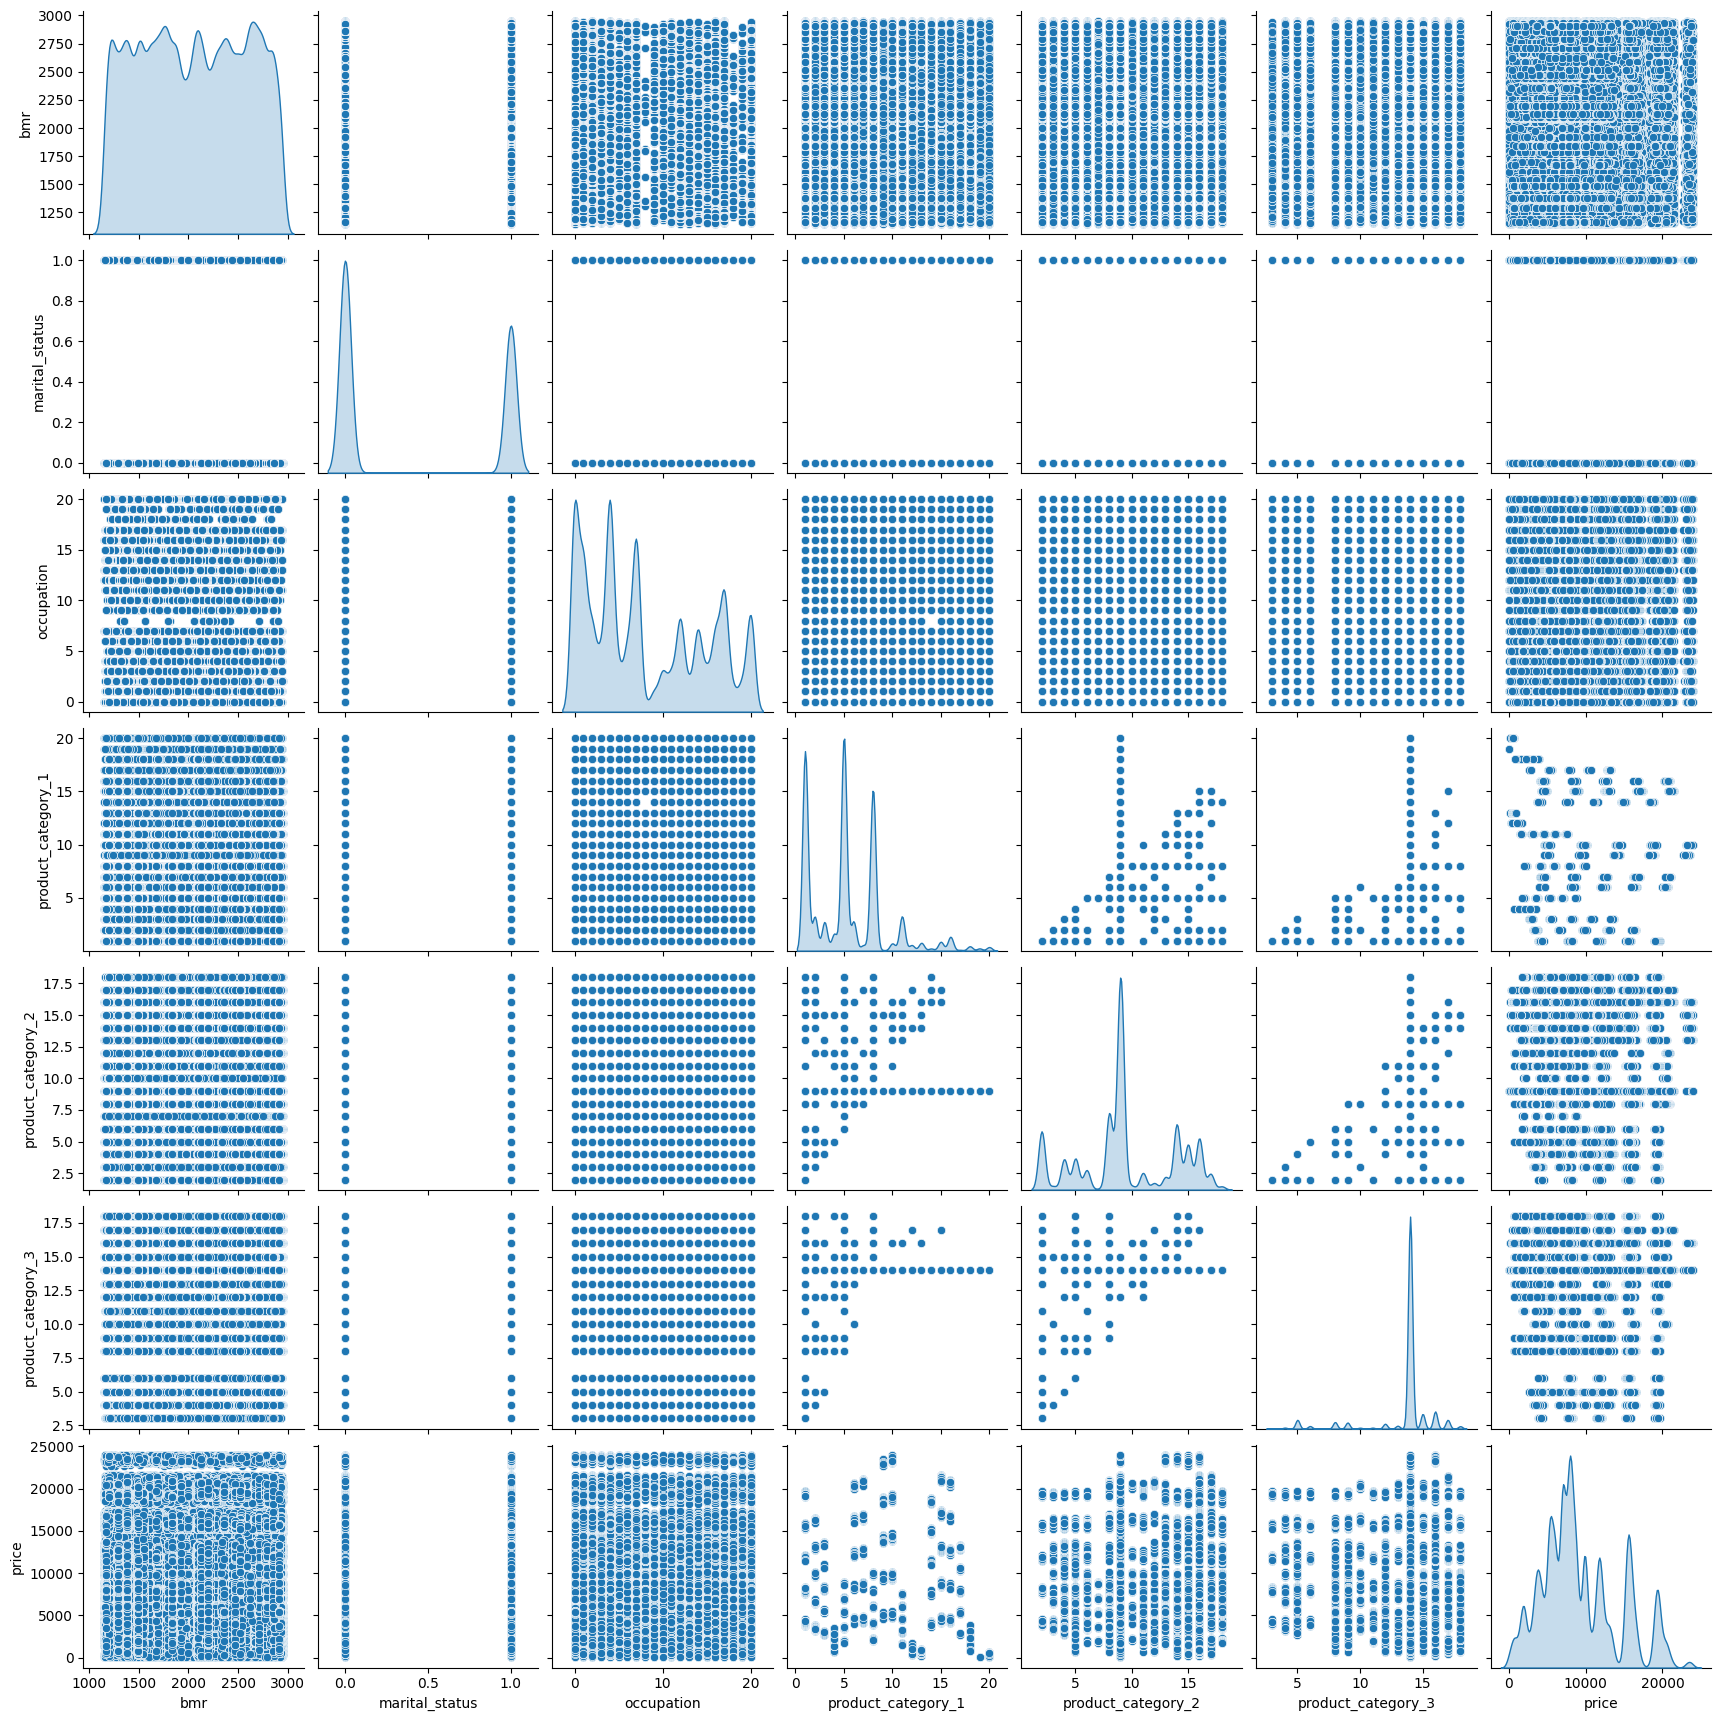

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data=final_df, diag_kind='kde')

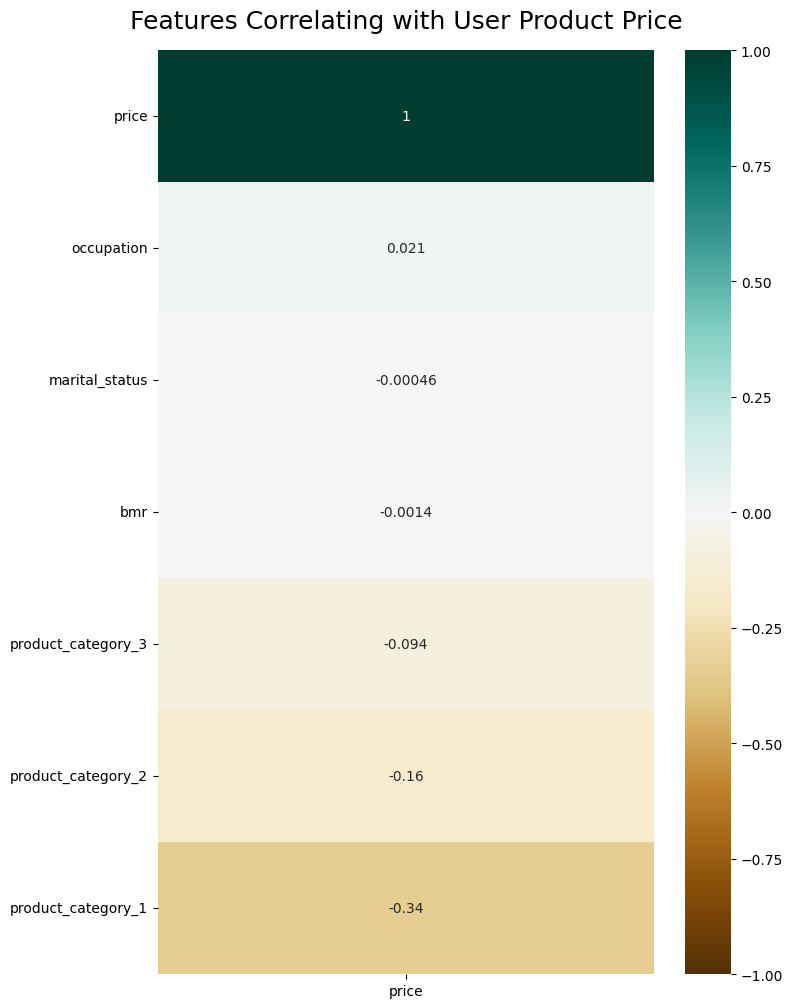

In [25]:
# Only consider numeric values
numeric_columns = final_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corr_matrix[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with User Product Price', fontdict={'fontsize':18}, pad=16);

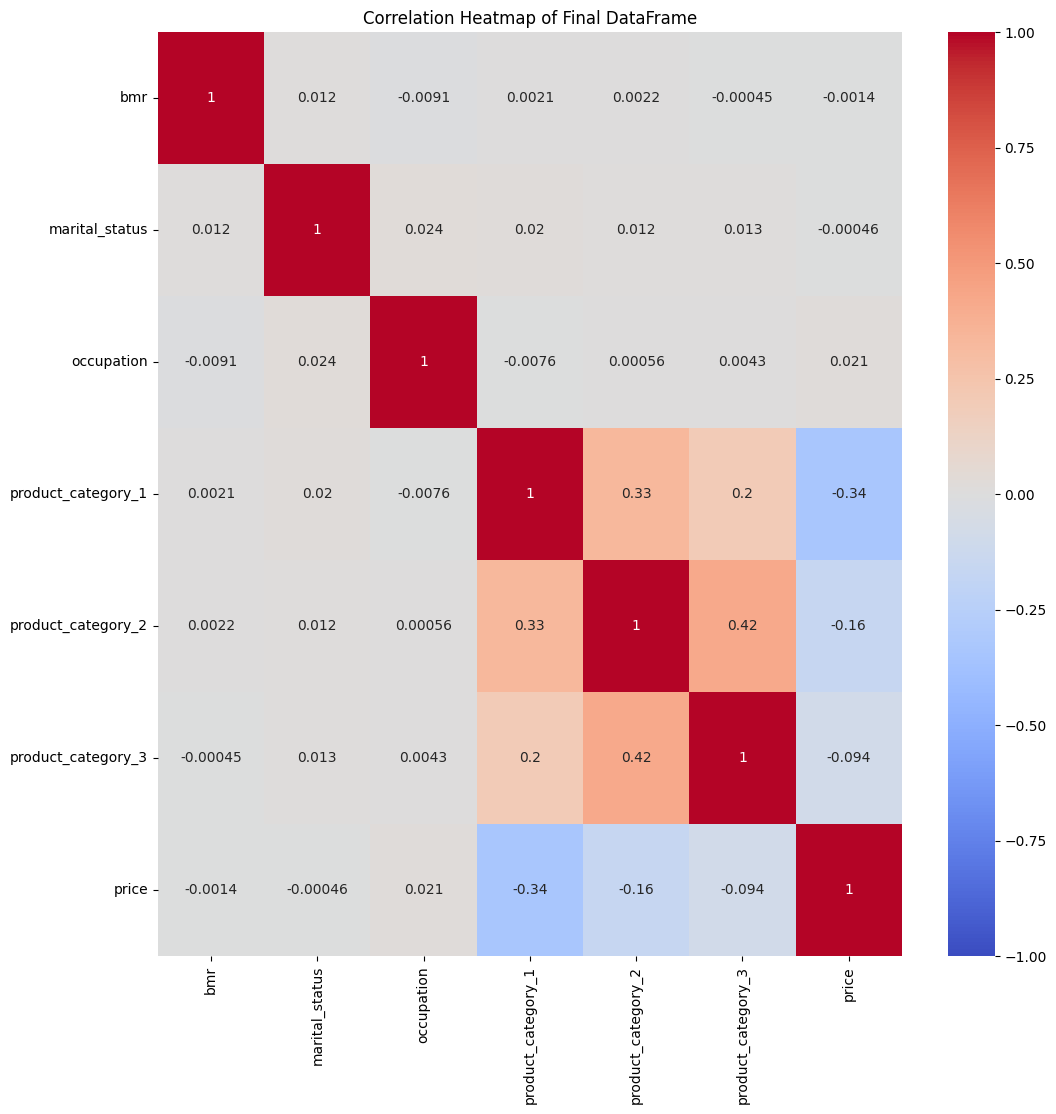

In [24]:
#To consider if there is any multicolinearity between data

# Only consider numeric values
numeric_columns = final_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Final DataFrame')
plt.show()

In [28]:
# Removing features with correlation tending towards 0

final_df = final_df.drop(['occupation', 'marital_status', 'bmr'], axis=1)

print(final_df.head(20))

    User_ID Product_ID   Age city_category gender stay_in_current_city_years  product_category_1  product_category_2  product_category_3    price
0   1000001  P00069042  0-17             A      F                          2                 3.0                 9.0                14.0   8370.0
1   1000001  P00248942  0-17             A      F                          2                 1.0                 6.0                14.0  15200.0
2   1000001  P00087842  0-17             A      F                          2                12.0                 9.0                14.0   1422.0
3   1000001  P00085442  0-17             A      F                          2                12.0                14.0                14.0   1057.0
4   1000001  P00085942  0-17             A      F                          2                 2.0                 4.0                 8.0  12842.0
5   1000001  P00102642  0-17             A      F                          2                 4.0                 8.0        

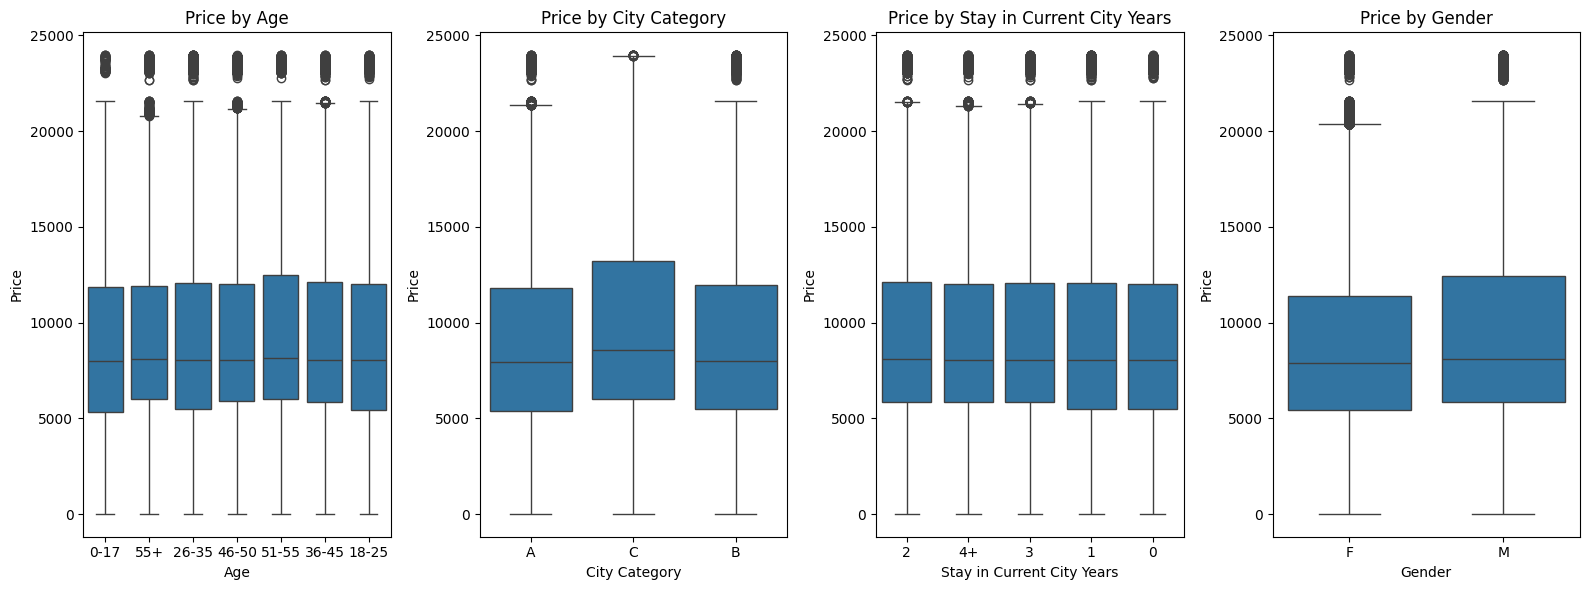

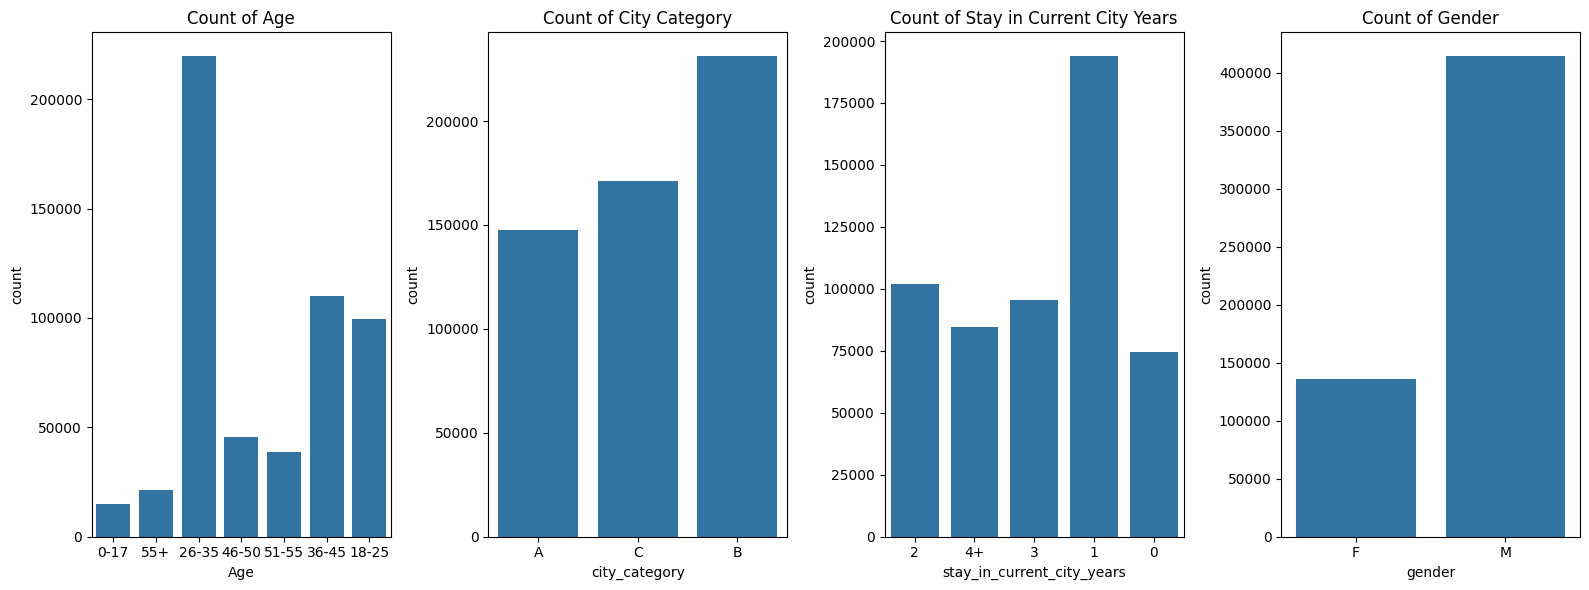

In [33]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 4, 1)
sns.boxplot(x='Age', y='price', data=final_df)
plt.title('Price by Age')
plt.xlabel('Age')
plt.ylabel('Price')

plt.subplot(1, 4, 2)
sns.boxplot(x='city_category', y='price', data=final_df)
plt.title('Price by City Category')
plt.xlabel('City Category')
plt.ylabel('Price')

plt.subplot(1, 4, 3)
sns.boxplot(x='stay_in_current_city_years', y='price', data=final_df)
plt.title('Price by Stay in Current City Years')
plt.xlabel('Stay in Current City Years')
plt.ylabel('Price')

plt.subplot(1, 4, 4)
sns.boxplot(x='gender', y='price', data=final_df)
plt.title('Price by Gender')
plt.xlabel('Gender')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

# Create count plots for categorical variables
plt.figure(figsize=(16, 6))

plt.subplot(1, 4, 1)
sns.countplot(x='Age', data=final_df)
plt.title('Count of Age')

plt.subplot(1, 4, 2)
sns.countplot(x='city_category', data=final_df)
plt.title('Count of City Category')

plt.subplot(1, 4, 3)
sns.countplot(x='stay_in_current_city_years', data=final_df)
plt.title('Count of Stay in Current City Years')

plt.subplot(1, 4, 4)
sns.countplot(x='gender', data=final_df)
plt.title('Count of Gender')

plt.tight_layout()
plt.show()

### 3) Model Training, Selection, Finetuning and Score

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
import numpy as np

# Separate features (X) and target variable (y)
X = final_df.drop(['User_ID', 'Product_ID', 'price'], axis=1)
y = final_df['price']

# Define categorical and numerical features
categorical_features = ['Age', 'city_category', 'gender', 'stay_in_current_city_years']
numerical_features = ['product_category_1', 'product_category_2', 'product_category_3']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Define regression models
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('LightGBM', LGBMRegressor()),
    ('XGBoost', XGBRegressor(objective='reg:squarederror'))
]

# Initialize lists to store results
results = []

# Iterate over models
for model_name, model in models:
    # Define the pipeline with regression model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = pipeline.predict(X_test)

    # Metrics to evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Append results to the list
    results.append({
        'Model': model_name,
        'R-squared': r2,
        'Mean Absolute Error': mae,
        'Root Mean Squared Error': rmse
    })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Print results
print(results_df)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 440054, number of used features: 16
[LightGBM] [Info] Start training from score 9264.793553
               Model  R-squared  Mean Absolute Error  Root Mean Squared Error
0  Linear Regression   0.128169          3581.198800              4677.817721
1      Decision Tree   0.633376          2245.970714              3033.455556
2      Random Forest   0.641904          2230.733311              2997.968582
3  Gradient Boosting   0.645605          2267.889437              2982.436041
4           LightGBM   0.657668          2210.521148              2931.238494
5            XGBoost   0.659115          2197.098676              2925.036303
